In [1]:
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import numpy as np

import elastic_database as edb
import seismic_tools as st

In [2]:
chl = edb.chlorite()

In [3]:
chl

<class 'ElasticClass.ElasticProps'>

Mineral Name: Chlorite
Reference Source: https://doi.org/10.1002/2014GL059334
Crystal System: Monoclinic
Pressure (GPa): 0.0
Temperature (°C): 25
Density (g/cm3): 2.534

Elastic Tensor (Cij) in GPa:
[[197.8  60.7  21.1   0.    3.3   0. ]
 [ 60.7 202.3  34.1   0.    0.2   0. ]
 [ 21.1  34.1 135.1   0.    0.4   0. ]
 [  0.    0.    0.   24.5   0.    0.1]
 [  3.3   0.2   0.4   0.   24.4   0. ]
 [  0.    0.    0.    0.1   0.   70.3]]

Calculated average properties:
Bulk Modulus (GPa) → VRH, (Reuss, Voigt)
82.553, (79.883, 85.222)

Shear Modulus (GPa) → VRH, (Reuss, Voigt)
45.772, (39.751, 51.793)

Isotropic Poisson Ratio → VRH, (Reuss, Voigt)
0.266, (0.287, 0.247))

Pugh's ratio → VRH, (Reuss, Voigt)
(1.804, (2.010, 1.645)

Anisotropy indexes
Universal Elastic Anisotropy: 1.581
Kube's Anisotropy Index (proportional): 0.595

Isotropic seismic properties → VRH, (Reuss, Voigt)
Vp (km/s): 7.527, (7.242, 7.803)
Vs (km/s): 4.250, (3.961, 4.521)
Vp/Vs: 1.771, 

In [4]:
model = st.weak_polar_anisotropy(chl)
model2 = st.polar_anisotropy(chl)

In [5]:
model

,polar_ang,azimuthal_ang,Vp,Vsv,Vsh
0,0.000000,0.000000,7.301706,3.109423,3.109423
1,0.025977,0.000000,7.300035,3.116033,3.111383
2,0.026454,3.883222,7.299973,3.116277,3.111456
3,0.026922,1.483259,7.299911,3.116522,3.111529
4,0.027383,5.366481,7.299849,3.116766,3.111601
...,...,...,...,...,...
79995,1.570740,0.068462,8.996070,3.109423,6.015781
79996,1.570753,3.951684,8.996070,3.109423,6.015781
79997,1.570765,1.551721,8.996070,3.109423,6.015781
79998,1.570778,5.434943,8.996070,3.109423,6.015781


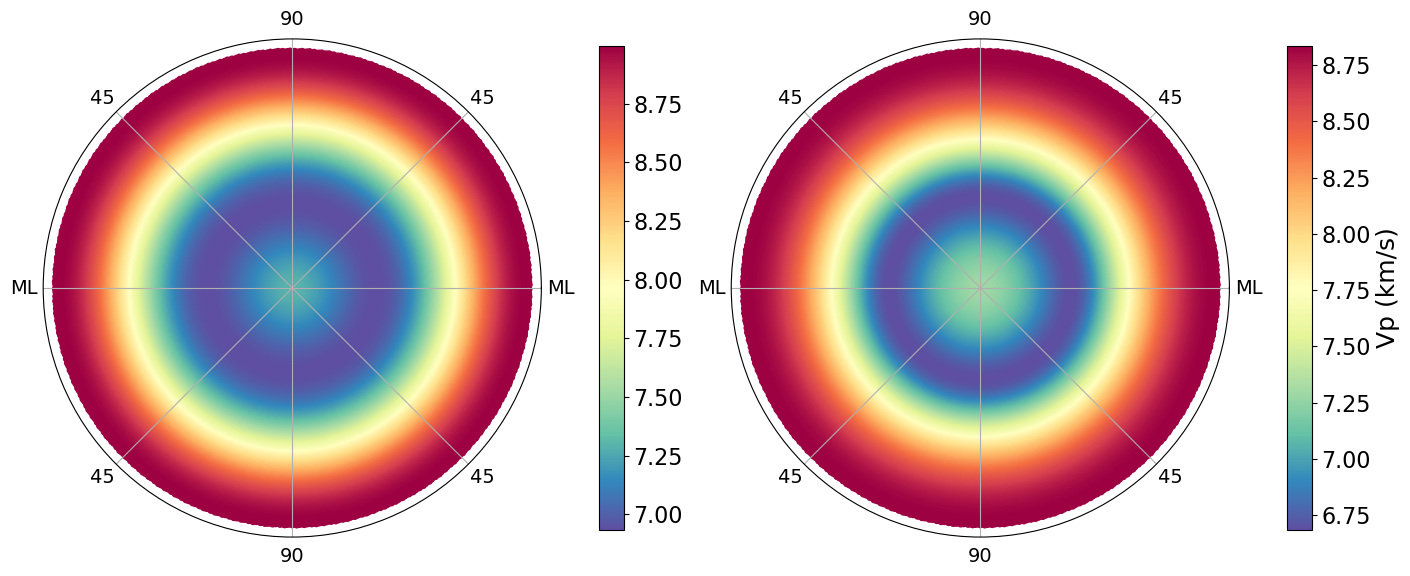

In [6]:
fig, (ax1, ax2) = plt.subplots(subplot_kw={'projection': 'polar'}, constrained_layout=True, ncols=2, figsize=(14,7))

# Model 1
ax1.set_theta_direction(-1)
ax1.set_xticks(np.arange(0, 2*np.pi, np.pi/4))
ax1.set_xticklabels(['ML', '45', '90', '45', 'ML', '45', '90', '45'], fontsize=14)
ax1.set_yticks([])

cm = ax1.scatter(model['azimuthal_ang'],
                model['polar_ang'],
                c=model['Vp'],
                s=15,
                cmap='Spectral_r')

# add color bar
cbar = fig.colorbar(cm, ax=ax1, shrink=0.7, location='right')
#cbar.set_label('Vp (km/s)', fontsize=18)
cbar.ax.tick_params(labelsize=16)

# Model 2
ax2.set_theta_direction(-1)
ax2.set_xticks(np.arange(0, 2*np.pi, np.pi/4))
ax2.set_xticklabels(['ML', '45', '90', '45', 'ML', '45', '90', '45'], fontsize=14)
ax2.set_yticks([])

cm = ax2.scatter(model2['azimuthal_ang'],
                model2['polar_ang'],
                c=model2['Vp'],
                s=15,
                cmap='Spectral_r')

# add color bar
cbar = fig.colorbar(cm, ax=ax2, shrink=0.7, location='right')
cbar.set_label('Vp (km/s)', fontsize=18)
cbar.ax.tick_params(labelsize=16)

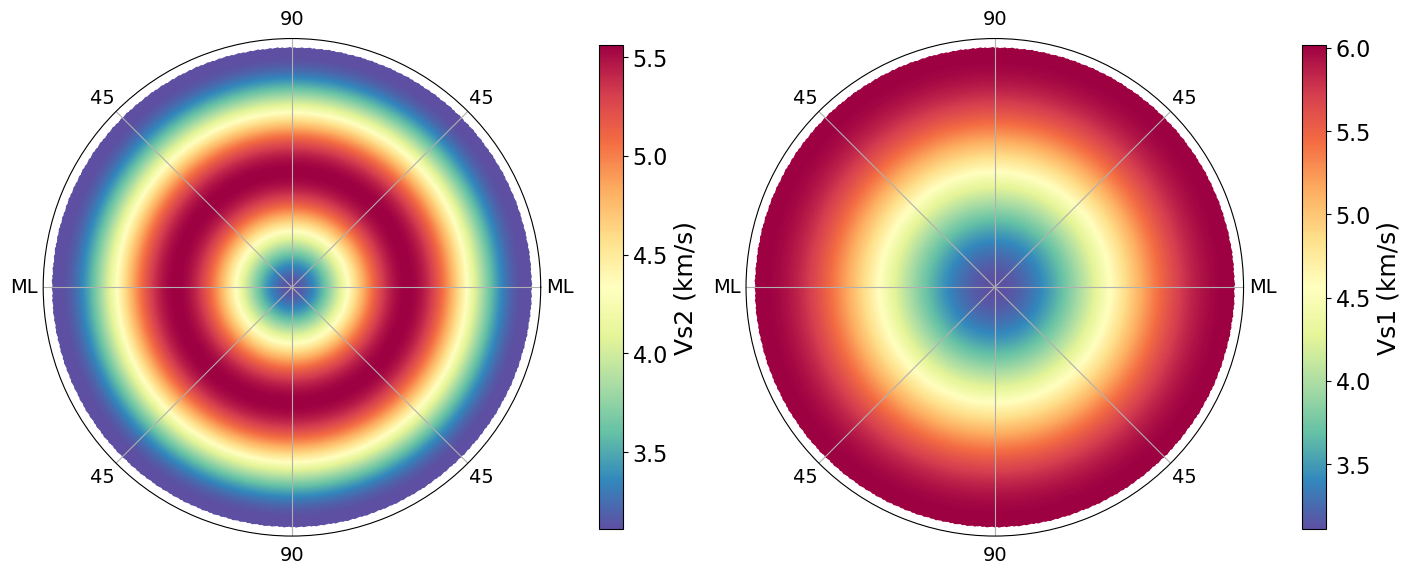

In [7]:
fig2, (ax1, ax2) = plt.subplots(subplot_kw={'projection': 'polar'}, constrained_layout=True, ncols=2, figsize=(14,7))

# VS2 (slow)
ax1.set_theta_direction(-1)
ax1.set_xticks(np.arange(0, 2*np.pi, np.pi/4))
ax1.set_xticklabels(['ML', '45', '90', '45', 'ML', '45', '90', '45'], fontsize=14)
ax1.set_yticks([])

cm = ax1.scatter(model['azimuthal_ang'],
                model['polar_ang'],
                c=model['Vsv'],
                s=15,
                cmap='Spectral_r')

# add color bar
cbar = fig.colorbar(cm, ax=ax1, shrink=0.7, location='right')
cbar.set_label('Vs2 (km/s)', fontsize=18)
cbar.ax.tick_params(labelsize=16)

# VS1 (fast)
ax2.set_theta_direction(-1)
ax2.set_xticks(np.arange(0, 2*np.pi, np.pi/4))
ax2.set_xticklabels(['ML', '45', '90', '45', 'ML', '45', '90', '45'], fontsize=14)
ax2.set_yticks([])

cm = ax2.scatter(model['azimuthal_ang'],
                model['polar_ang'],
                c=model['Vsh'],
                s=15,
                cmap='Spectral_r')

# add color bar
cbar = fig.colorbar(cm, ax=ax2, shrink=0.7, location='right')
cbar.set_label('Vs1 (km/s)', fontsize=18)
cbar.ax.tick_params(labelsize=16)

## Test equispaced S2 grid

In [8]:
azimuths, polar = st.equispaced_S2_grid(n=100, degrees=True, hemisphere='upper')

In [9]:
polar

array([ 0.        , 14.69306988, 16.76852115, 18.61984807, 20.30848067,
       21.87217466, 23.33609785, 24.7180205 , 26.0310412 , 27.28514343,
       28.48814285, 29.64629375, 30.76469344, 31.84756125, 32.89843663,
       33.92032324, 34.91579607, 35.88708251, 36.83612471, 37.76462829,
       38.67410087, 39.56588287, 40.44117243, 41.30104578, 42.14647396,
       42.97833676, 43.79743437, 44.60449713, 45.40019391, 46.18513912,
       46.95989881, 47.72499593, 48.48091479, 49.22810507, 49.96698519,
       50.69794537, 51.42135027, 52.13754133, 52.84683884, 53.54954381,
       54.24593957, 54.9362933 , 55.62085729, 56.29987018, 56.97355798,
       57.64213507, 58.30580506, 58.96476161, 59.61918909, 60.2692633 ,
       60.91515206, 61.55701571, 62.19500769, 62.82927494, 63.45995836,
       64.08719317, 64.71110931, 65.33183175, 65.94948082, 66.56417244,
       67.17601848, 67.78512691, 68.39160211, 68.99554502, 69.59705339,
       70.19622194, 70.79314256, 71.38790443, 71.98059422, 72.57

In [10]:
azimuths

array([  0.        ,   0.        , 222.49223595,  84.9844719 ,
       307.47670785, 169.9689438 ,  32.46117975, 254.9534157 ,
       117.44565165, 339.9378876 , 202.43012355,  64.9223595 ,
       287.41459545, 149.9068314 ,  12.39906735, 234.8913033 ,
        97.38353925, 319.8757752 , 182.36801115,  44.8602471 ,
       267.35248305, 129.844719  , 352.33695495, 214.8291909 ,
        77.32142685, 299.8136628 , 162.30589875,  24.7981347 ,
       247.29037065, 109.7826066 , 332.27484255, 194.7670785 ,
        57.25931445, 279.7515504 , 142.24378635,   4.7360223 ,
       227.22825825,  89.7204942 , 312.21273015, 174.7049661 ,
        37.19720205, 259.689438  , 122.18167395, 344.6739099 ,
       207.16614585,  69.6583818 , 292.15061775, 154.6428537 ,
        17.13508965, 239.6273256 , 102.11956155, 324.6117975 ,
       187.10403345,  49.5962694 , 272.08850535, 134.5807413 ,
       357.07297725, 219.5652132 ,  82.05744915, 304.5496851 ,
       167.04192105,  29.534157  , 252.02639295, 114.51

In [11]:
#%matplotlib qt

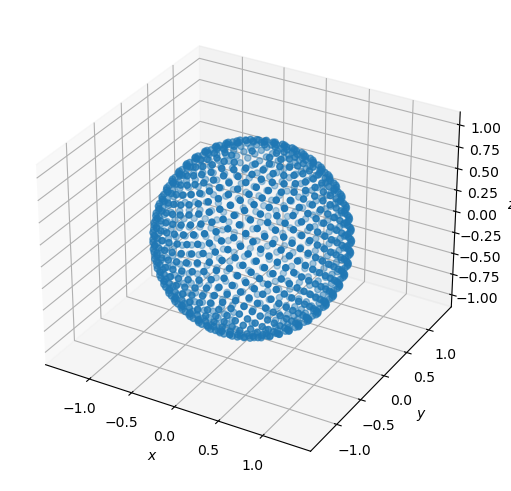

In [12]:
azimuths, polar = st.equispaced_S2_grid(n=1000)
x, y, z = st.sph2cart(azimuths, polar)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, constrained_layout=True)

ax.scatter(x, y, z)
ax.axis('equal')
_ = ax.set_xlabel(r'$x$'), ax.set_ylabel(r'$y$'), ax.set_zlabel(r'$z$')

In [13]:
coordinates = st.sph2cart(azimuths, polar)

---

## Testing the general procedure

In [14]:
# load test data
Cij = np.array([[118.8,  53.8,  53.8,   0. ,   0. ,   0. ],
                [ 53.8, 118.8,  53.8,   0. ,   0. ,   0. ],
                [ 53.8,  53.8, 118.8,   0. ,   0. ,   0. ],
                [  0. ,   0. ,   0. ,  59.4,   0. ,   0. ],
                [  0. ,   0. ,   0. ,   0. ,  59.4,   0. ],
                [  0. ,   0. ,   0. ,   0. ,   0. ,  59.4]])

density = 5.307

In [15]:
scaling_factor = 1 / density

In [16]:
Cijkl = st._rearrange_tensor(Cij)
Cijkl.shape

(3, 3, 3, 3)

In [17]:
M = st._christoffel_matrix(wave_vector=np.array([1,0,0]), Cijkl=Cijkl)
M = M * scaling_factor
M

array([[22.38552855,  0.        ,  0.        ],
       [ 0.        , 11.19276427,  0.        ],
       [ 0.        ,  0.        , 11.19276427]])

In [18]:
st.calc_phase_velocities(M)  # (Vs2, Vs1, Vp)

array([3.34555889, 3.34555889, 4.73133475])

In [19]:
st._calc_eigen(M)  # eigenvalues (3,), eigenvectors (3,3)

(array([11.19276427, 11.19276427, 22.38552855]),
 array([[0., 1., 0.],
        [0., 0., 1.],
        [1., 0., 0.]]))

In [20]:
M2 = st._christoffel_matrix(wave_vector=np.array([1,1,0]), Cijkl=Cijkl)
M2 = M2 * scaling_factor
M2


array([[16.78914641, 10.66515922,  0.        ],
       [10.66515922, 16.78914641,  0.        ],
       [ 0.        ,  0.        , 11.19276427]])

In [21]:
st.calc_phase_velocities(M2)  # (Vs2, Vs1, Vp)

array([2.47466911, 3.34555889, 5.23968564])

In [22]:
eigenvalues, eigenvectors = st._calc_eigen(M2)

In [33]:
st.calculate_polarisation_angle(polar_angle=np.deg2rad(45),
                                azimuth_angle=np.deg2rad(315),
                                polarisation_vector=eigenvectors[1])

54.735610317245346